C:\Users\User\AppData\Local\Temp\ipykernel_12412\110029291.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 20 * np.log10(abs(h)), label=f'Orden {order}')



>>> Filtro Butterworth orden 4
b = [2.8e-05, 0.0, -0.000114, 0.0, 0.000171, 0.0, -0.000114, 0.0, 2.8e-05]
a = [1.0, -4.620708, 11.613022, -18.678228, 21.139281, -16.896983, 9.503538, -3.420481, 0.669705]


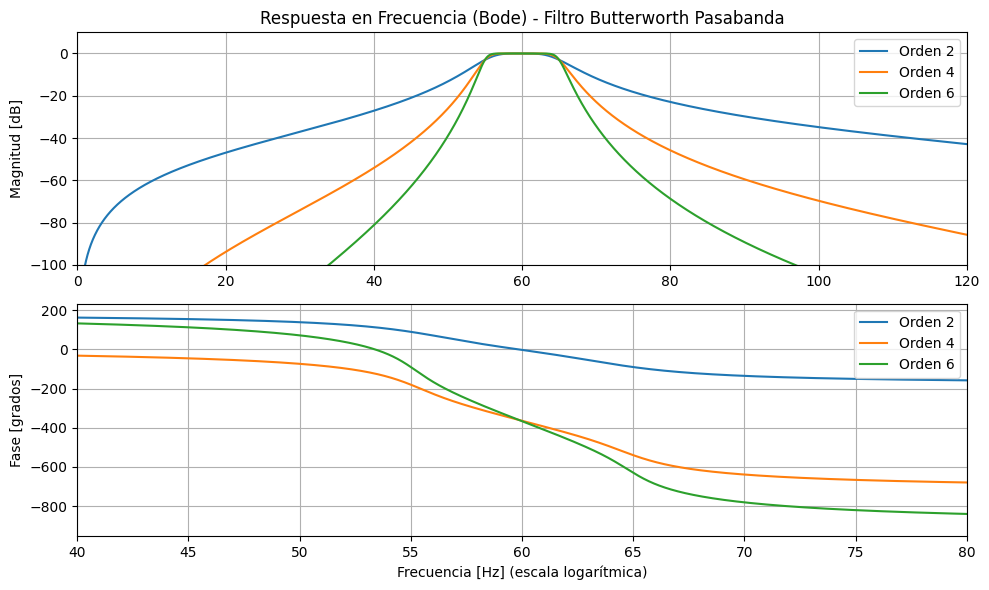

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# === Parámetros del filtro ===
fs = 410            # Frecuencia de muestreo (Hz)
lowcut = 55          # Frecuencia de corte baja (Hz)
highcut = 65        # Frecuencia de corte alta (Hz)
ordenes = [2, 4, 6]  # Órdenes del filtro para comparar

# === Gráfico ===
plt.figure(figsize=(10, 6))

for order in ordenes:
    nyq = fs / 2.0
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    w, h = freqz(b, a, worN=8000)
    freqs = w * fs / (2 * np.pi)

    # Magnitud (Bode)
    plt.subplot(2, 1, 1)
    #plt.semilogx(freqs, 20 * np.log10(np.abs(h)), label=f'Orden {order}')
    plt.plot(freqs, 20 * np.log10(abs(h)), label=f'Orden {order}')

    # Fase
    plt.subplot(2, 1, 2)
    angles = np.unwrap(np.angle(h))
    #plt.semilogx(freqs, angles * 180 / np.pi, label=f'Orden {order}')
    plt.plot(freqs, angles * 180 / np.pi, label=f'Orden {order}')

    # Imprime coeficientes solo del orden más alto
    if order == 4:
        print(f"\n>>> Filtro Butterworth orden {order}")
        print("b =", np.round(b, 6).tolist())
        print("a =", np.round(a, 6).tolist())

# === Estética ===
plt.subplot(2, 1, 1)
plt.title("Respuesta en Frecuencia (Bode) - Filtro Butterworth Pasabanda")
plt.ylabel("Magnitud [dB]")
plt.grid(True, which='both')
plt.legend()
plt.xlim(0, 120)
plt.ylim(-100,10)

plt.subplot(2, 1, 2)
plt.xlabel("Frecuencia [Hz] (escala logarítmica)")
plt.ylabel("Fase [grados]")
plt.grid(True, which='both')
plt.legend()
plt.xlim(40, 80)

plt.tight_layout()
plt.show()

In [52]:
from scipy.signal import butter

# Filtro pasabanda 4° orden para 55–65 Hz, fs = 1000 Hz
fs = 1000
low = 55 / (fs / 2)
high = 65 / (fs / 2)

b, a = butter(4, [low, high], btype='bandpass')

# Imprimir coeficientes en formato para Arduino
print("// Coeficientes del filtro Butterworth pasabanda 55-65 Hz, orden 4")
print(f"#define FILTER_ORDER {len(b)-1}")

print("\n// Coeficientes b (numerador)")
print("float b[] = {", end="")
for i, coeff in enumerate(b):
    print(f"{coeff:.15f}", end="")
    if i < len(b) - 1:
        print(", ", end="")
print("};")

print("\n// Coeficientes a (denominador)")
print("float a[] = {", end="")
for i, coeff in enumerate(a):
    print(f"{coeff:.15f}", end="")
    if i < len(a) - 1:
        print(", ", end="")
print("};")

// Coeficientes del filtro Butterworth pasabanda 55-65 Hz, orden 4
#define FILTER_ORDER 8

// Coeficientes b (numerador)
float b[] = {0.000000898486146, 0.000000000000000, -0.000003593944586, 0.000000000000000, 0.000005390916878, 0.000000000000000, -0.000003593944586, 0.000000000000000, 0.000000898486146};

// Coeficientes a (denominador)
float a[] = {1.000000000000000, -7.289163097189300, 23.763086944632381, -45.191564177537259, 54.797797959311637, -43.373661991347539, 21.889745066971372, -6.444447565273880, 0.848555999266477};


In [29]:
import scipy.signal as sig
fs  = 1000.0
bp  = [55, 65]           # Banda pasante
sos = sig.iirfilter(
        N=4,              # 4.º orden
        Wn=[bp[0]/(fs/2), bp[1]/(fs/2)],
        btype='band',
        ftype='butter',
        output='sos')
print(sos)

[[ 8.98486146e-07  1.79697229e-06  8.98486146e-07  1.00000000e+00
  -1.79756457e+00  9.41903738e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.81789764e+00  9.45255551e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.81413419e+00  9.74531942e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.85956670e+00  9.77977072e-01]]


Coeficientes SOS (Second Order Sections):
Formato: [b0, b1, b2, a0, a1, a2] por cada biquad
Biquad 1: [ 8.98486146e-07  1.79697229e-06  8.98486146e-07  1.00000000e+00
 -1.79756457e+00  9.41903738e-01]
Biquad 2: [ 1.          2.          1.          1.         -1.81789764  0.94525555]
Biquad 3: [ 1.         -2.          1.          1.         -1.81413419  0.97453194]
Biquad 4: [ 1.         -2.          1.          1.         -1.8595667   0.97797707]

=== GENERANDO DIAGRAMA DE BODE ===


C:\Users\User\AppData\Local\Temp\ipykernel_12412\2139717225.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


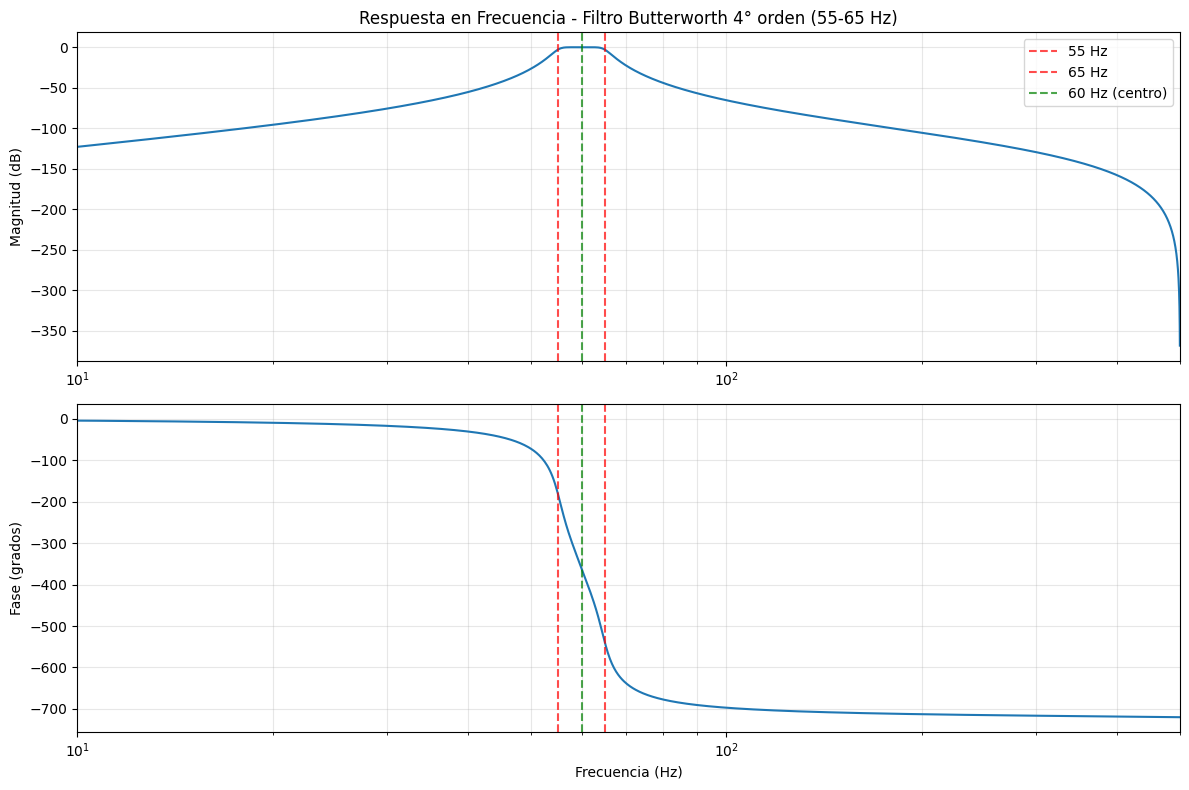


=== GANANCIA EN FRECUENCIAS ESPECÍFICAS ===
 30 Hz: -75.71 dB
 45 Hz: -42.81 dB
 55 Hz:  -3.01 dB
 60 Hz:  -0.00 dB
 65 Hz:  -3.01 dB
 80 Hz: -44.14 dB
100 Hz: -65.36 dB


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Parámetros del filtro
fs = 1000  # Hz
band = [55, 65]  # Hz
order = 4

# Diseño del filtro en formato SOS (Second Order Sections)
sos = signal.butter(order, band, btype='bandpass', fs=fs, output='sos')

print("Coeficientes SOS (Second Order Sections):")
print("Formato: [b0, b1, b2, a0, a1, a2] por cada biquad")
for i, section in enumerate(sos):
    print(f"Biquad {i+1}: {section}")

# 1. DIAGRAMA DE BODE
print("\n=== GENERANDO DIAGRAMA DE BODE ===")
w, h = signal.sosfreqz(sos, worN=2048, fs=fs)

plt.figure(figsize=(12, 8))

# Magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en Frecuencia - Filtro Butterworth 4° orden (55-65 Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.axvline(55, color='r', linestyle='--', alpha=0.7, label='55 Hz')
plt.axvline(65, color='r', linestyle='--', alpha=0.7, label='65 Hz')
plt.axvline(60, color='g', linestyle='--', alpha=0.7, label='60 Hz (centro)')
plt.legend()
plt.xlim([10, 500])

# Fase
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.semilogx(w, angles * 180 / np.pi)
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.axvline(55, color='r', linestyle='--', alpha=0.7)
plt.axvline(65, color='r', linestyle='--', alpha=0.7)
plt.axvline(60, color='g', linestyle='--', alpha=0.7)
plt.xlim([10, 500])

plt.tight_layout()
plt.show()

# Verificar ganancia en frecuencias específicas
test_freqs = [30, 45, 55, 60, 65, 80, 100]
print(f"\n=== GANANCIA EN FRECUENCIAS ESPECÍFICAS ===")
for freq in test_freqs:
    w_test = 2 * np.pi * freq / fs
    _, h_test = signal.sosfreqz(sos, worN=[w_test])
    gain_db = 20 * np.log10(abs(h_test[0]))
    print(f"{freq:3d} Hz: {gain_db:6.2f} dB")


=== SIMULACIÓN CON SEÑALES SINTÉTICAS ===


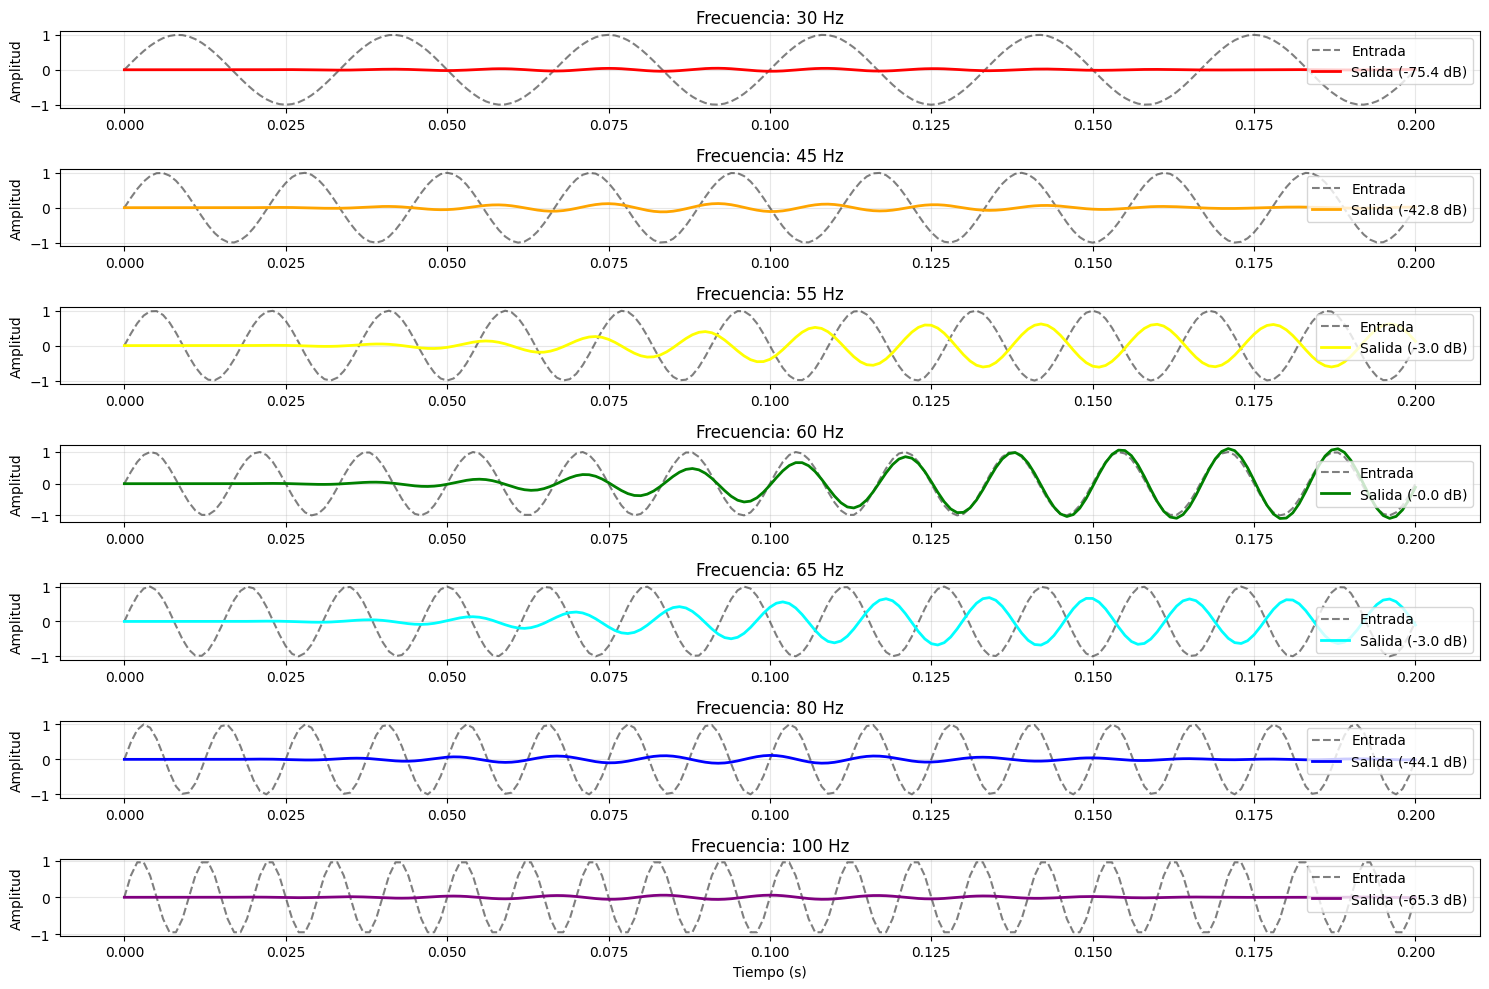


RESUMEN DE GANANCIAS:
Freq (Hz) | Ganancia (dB) | Comentario
----------------------------------------
      30 |     -75.44 | RECHAZA ✓
      45 |     -42.80 | RECHAZA ✓
      55 |      -3.01 | PASA ✓
      60 |      -0.00 | PASA ✓
      65 |      -3.01 | PASA ✓
      80 |     -44.14 | RECHAZA ✓
     100 |     -65.33 | RECHAZA ✓


In [32]:
# 2. SIMULACIÓN CON SEÑALES SINTÉTICAS
print("\n=== SIMULACIÓN CON SEÑALES SINTÉTICAS ===")

# Implementación del filtro SOS (simulando el código del ESP32)
def apply_sos_filter(x, sos):
    """
    Aplica filtro SOS muestra por muestra (como en el ESP32)
    """
    # Estados internos de cada biquad (z1, z2)
    states = np.zeros((len(sos), 2))
    
    output = np.zeros_like(x)
    
    for n, sample in enumerate(x):
        # Procesar cada biquad en cascada
        current_sample = sample
        
        for i, (b0, b1, b2, a0, a1, a2) in enumerate(sos):
            # Forma transpuesta II
            y = b0 * current_sample + states[i, 0]
            states[i, 0] = b1 * current_sample - a1 * y + states[i, 1]
            states[i, 1] = b2 * current_sample - a2 * y
            current_sample = y
        
        output[n] = current_sample
    
    return output

# Parámetros de simulación
duration = 2.0  # segundos
t = np.arange(0, duration, 1/fs)

# Crear señales de prueba
test_frequencies = [30, 45, 55, 60, 65, 80, 100]
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple']

plt.figure(figsize=(15, 10))

for i, (freq, color) in enumerate(zip(test_frequencies, colors)):
    # Generar señal sinusoidal
    signal_in = np.sin(2 * np.pi * freq * t)
    
    # Aplicar filtro
    signal_out = apply_sos_filter(signal_in, sos)
    
    # Calcular ganancia RMS
    rms_in = np.sqrt(np.mean(signal_in[int(fs*0.5):]**2))  # Después del transitorio
    rms_out = np.sqrt(np.mean(signal_out[int(fs*0.5):]**2))
    gain_db = 20 * np.log10(rms_out / rms_in) if rms_in > 0 else -100
    
    # Subplot para cada frecuencia
    plt.subplot(len(test_frequencies), 1, i+1)
    
    # Mostrar solo los primeros 0.2 segundos para claridad
    time_window = t <= 0.2
    plt.plot(t[time_window], signal_in[time_window], 'k--', alpha=0.5, label='Entrada')
    plt.plot(t[time_window], signal_out[time_window], color=color, linewidth=2, 
             label=f'Salida ({gain_db:.1f} dB)')
    
    plt.title(f'Frecuencia: {freq} Hz')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    if i == len(test_frequencies) - 1:
        plt.xlabel('Tiempo (s)')

plt.tight_layout()
plt.show()

print("\nRESUMEN DE GANANCIAS:")
print("Freq (Hz) | Ganancia (dB) | Comentario")
print("-" * 40)
for freq in test_frequencies:
    signal_test = np.sin(2 * np.pi * freq * t)
    signal_filtered = apply_sos_filter(signal_test, sos)
    
    # Calcular después del transitorio
    rms_in = np.sqrt(np.mean(signal_test[int(fs*0.5):]**2))
    rms_out = np.sqrt(np.mean(signal_filtered[int(fs*0.5):]**2))
    gain_db = 20 * np.log10(rms_out / rms_in)
    
    if 55 <= freq <= 65:
        comment = "PASA ✓"
    elif gain_db < -20:
        comment = "RECHAZA ✓"
    else:
        comment = "TRANSICIÓN"
    
    print(f"{freq:8d} | {gain_db:10.2f} | {comment}")


=== PRUEBA CON SEÑAL MIXTA ===


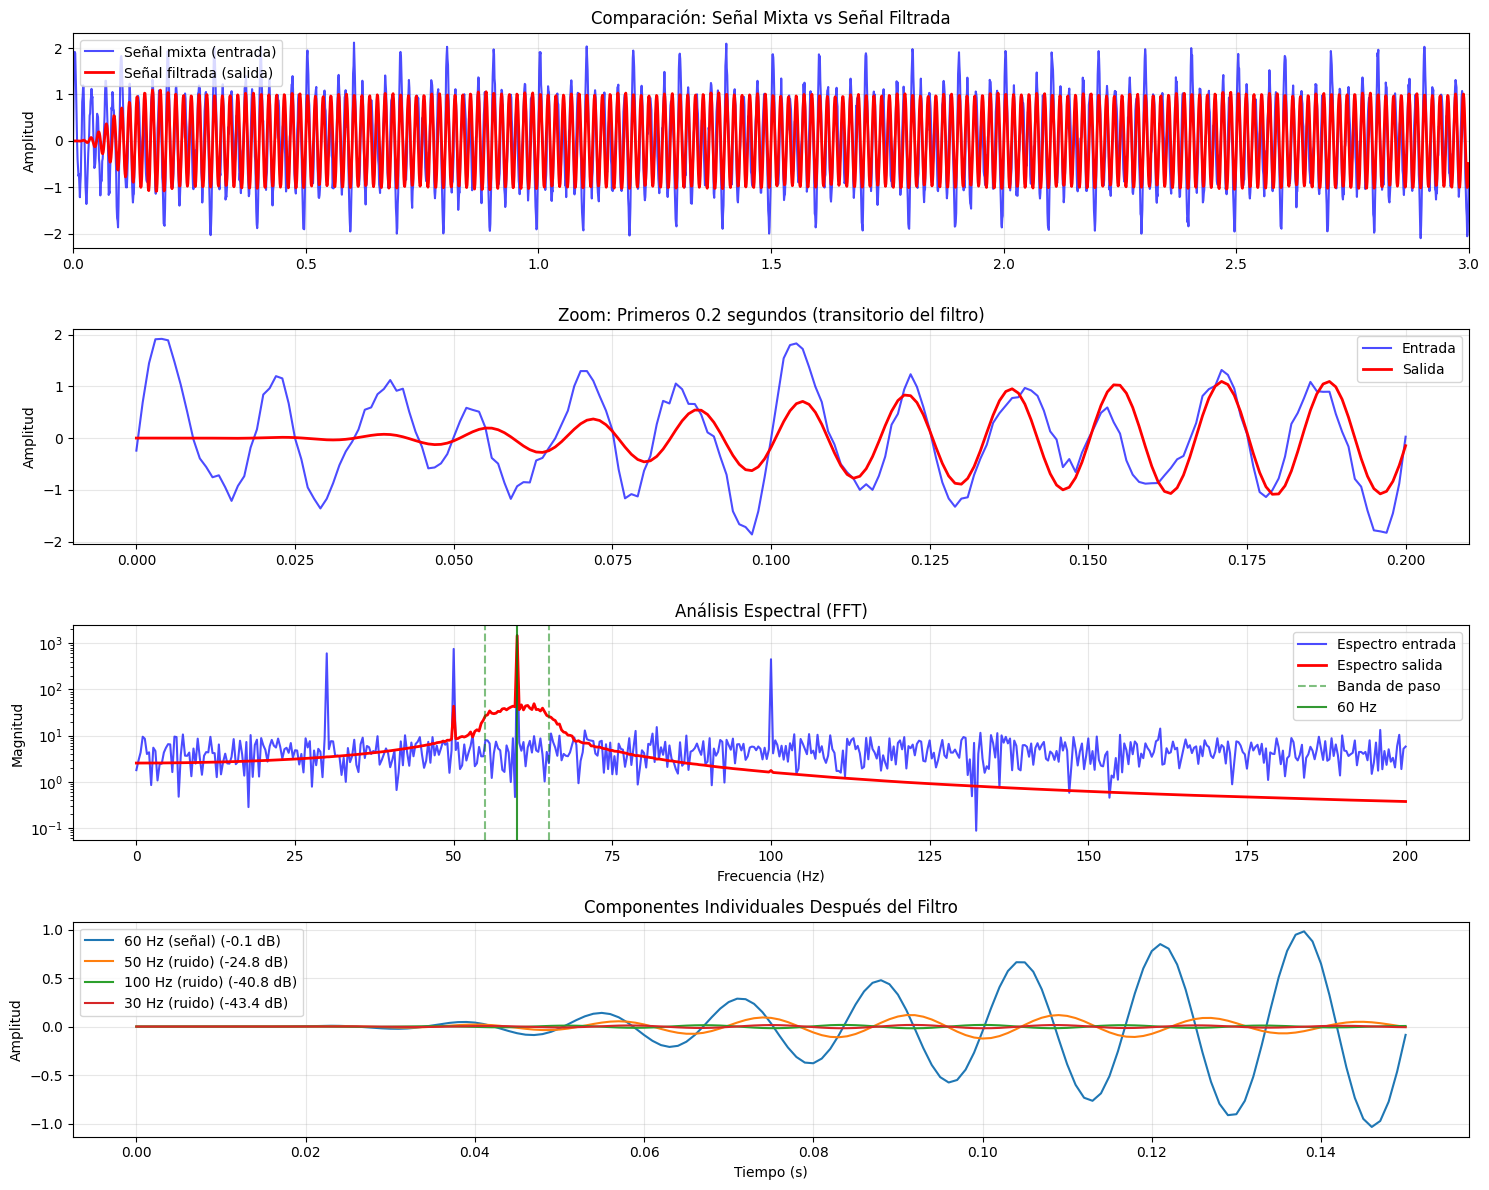


ESTADÍSTICAS DE RENDIMIENTO:
SNR entrada:  2.80 dB
SNR salida:   28.87 dB
Mejora SNR:   26.06 dB

ATENUACIÓN POR COMPONENTE:
 50 Hz:  -24.8 dB
100 Hz:  -40.8 dB
 30 Hz:  -43.4 dB
 60 Hz:   -0.1 dB (señal de interés)


In [33]:
# 3. PRUEBA CON SEÑAL MIXTA (SIMULANDO RUIDO + SEÑAL DE INTERÉS)
print("\n=== PRUEBA CON SEÑAL MIXTA ===")

# Crear una señal que simule condiciones reales
t_mix = np.arange(0, 3.0, 1/fs)

# Componentes de la señal
signal_60hz = 1.0 * np.sin(2 * np.pi * 60 * t_mix)      # Señal de interés (60 Hz)
noise_50hz = 0.5 * np.sin(2 * np.pi * 50 * t_mix)       # Ruido de red (50 Hz)
noise_100hz = 0.3 * np.sin(2 * np.pi * 100 * t_mix)     # Armónico (100 Hz)
noise_30hz = 0.4 * np.sin(2 * np.pi * 30 * t_mix)       # Ruido de baja frecuencia
white_noise = 0.1 * np.random.randn(len(t_mix))         # Ruido blanco

# Señal mixta
mixed_signal = signal_60hz + noise_50hz + noise_100hz + noise_30hz + white_noise

# Aplicar filtro
filtered_signal = apply_sos_filter(mixed_signal, sos)

# Visualización
plt.figure(figsize=(15, 12))

# Señal original vs filtrada (vista completa)
plt.subplot(4, 1, 1)
plt.plot(t_mix, mixed_signal, 'b-', alpha=0.7, label='Señal mixta (entrada)')
plt.plot(t_mix, filtered_signal, 'r-', linewidth=2, label='Señal filtrada (salida)')
plt.title('Comparación: Señal Mixta vs Señal Filtrada')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 3])

# Zoom en los primeros 0.2 segundos
plt.subplot(4, 1, 2)
time_zoom = t_mix <= 0.2
plt.plot(t_mix[time_zoom], mixed_signal[time_zoom], 'b-', alpha=0.7, label='Entrada')
plt.plot(t_mix[time_zoom], filtered_signal[time_zoom], 'r-', linewidth=2, label='Salida')
plt.title('Zoom: Primeros 0.2 segundos (transitorio del filtro)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, alpha=0.3)

# Análisis espectral (FFT)
plt.subplot(4, 1, 3)
freqs = np.fft.fftfreq(len(t_mix), 1/fs)
fft_input = np.abs(np.fft.fft(mixed_signal))
fft_output = np.abs(np.fft.fft(filtered_signal))

# Solo frecuencias positivas hasta 200 Hz
mask = (freqs >= 0) & (freqs <= 200)
plt.semilogy(freqs[mask], fft_input[mask], 'b-', alpha=0.7, label='Espectro entrada')
plt.semilogy(freqs[mask], fft_output[mask], 'r-', linewidth=2, label='Espectro salida')
plt.axvline(55, color='g', linestyle='--', alpha=0.5, label='Banda de paso')
plt.axvline(65, color='g', linestyle='--', alpha=0.5)
plt.axvline(60, color='g', linestyle='-', alpha=0.8, label='60 Hz')
plt.title('Análisis Espectral (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparación de componentes individuales
plt.subplot(4, 1, 4)
components = {
    '60 Hz (señal)': signal_60hz,
    '50 Hz (ruido)': noise_50hz,
    '100 Hz (ruido)': noise_100hz,
    '30 Hz (ruido)': noise_30hz
}

time_comp = t_mix <= 0.15
for name, component in components.items():
    filtered_comp = apply_sos_filter(component, sos)
    attenuation = 20 * np.log10(np.std(filtered_comp) / np.std(component))
    plt.plot(t_mix[time_comp], filtered_comp[time_comp], 
             label=f'{name} ({attenuation:.1f} dB)')

plt.title('Componentes Individuales Después del Filtro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de rendimiento
print("\nESTADÍSTICAS DE RENDIMIENTO:")
print("=" * 50)

# Relación señal/ruido antes y después
signal_power_in = np.var(signal_60hz)
noise_power_in = np.var(mixed_signal - signal_60hz)
snr_in = 10 * np.log10(signal_power_in / noise_power_in)

# Para la salida, comparamos con la señal de 60 Hz filtrada
signal_60hz_filtered = apply_sos_filter(signal_60hz, sos)
signal_power_out = np.var(signal_60hz_filtered)
noise_power_out = np.var(filtered_signal - signal_60hz_filtered)
snr_out = 10 * np.log10(signal_power_out / noise_power_out)

print(f"SNR entrada:  {snr_in:.2f} dB")
print(f"SNR salida:   {snr_out:.2f} dB")
print(f"Mejora SNR:   {snr_out - snr_in:.2f} dB")

# Atenuación de cada componente de ruido
print(f"\nATENUACIÓN POR COMPONENTE:")
for freq, component in [(50, noise_50hz), (100, noise_100hz), (30, noise_30hz)]:
    filtered_comp = apply_sos_filter(component, sos)
    attenuation = 20 * np.log10(np.std(filtered_comp) / np.std(component))
    print(f"{freq:3d} Hz: {attenuation:6.1f} dB")

# Ganancia de la señal de interés
signal_gain = 20 * np.log10(np.std(signal_60hz_filtered) / np.std(signal_60hz))
print(f" 60 Hz: {signal_gain:6.1f} dB (señal de interés)")